## Process and plot output from DRMSD calculations

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
import matplotlib.gridspec as gridspec

In [3]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [4]:
D = pd.read_csv('DRMSD_mean_pairs_all_versus_centroid.csv',index_col=0)
print(D)
print(D.max())

           0          1          2          3          4          5  \
0   5.883664  21.495806   8.945284  12.883631  15.015118  19.341607   
1  21.495806   2.765281  21.159825  33.375951  19.585361  19.087568   
2   8.945284  21.159825  10.630528  14.591049  18.725814  15.239894   
3  12.883631  33.375951  14.591049   6.419866  29.280553  25.075952   
4  15.015118  19.585361  18.725814  29.280553   7.023909  15.596499   
5  19.341607  19.087568  15.239894  25.075952  15.596499  19.469813   
6  12.678749  23.682502  26.146984  16.173648  19.374797  28.356590   
7   9.382653  20.520112  24.393530  20.123933  12.183308  26.144551   

           6          7  
0  12.678749   9.382653  
1  23.682502  20.520112  
2  26.146984  24.393530  
3  16.173648  20.123933  
4  19.374797  12.183308  
5  28.356590  26.144551  
6   9.849137  19.326809  
7  19.326809   1.281270  
0    21.495806
1    33.375951
2    26.146984
3    33.375951
4    29.280553
5    28.356590
6    28.356590
7    26.144551
dtype:

In [5]:
print(D.columns.values)

['0' '1' '2' '3' '4' '5' '6' '7']


In [6]:
IDs = {}
for line in open('RBs_indexes_DRMSD_calculation_all_versus_centroid.dat'):
    vals = line.split('\t')
    IDs[vals[0]] = vals[1].strip()
    print(line)
    
print(IDs)
print(len(IDs))

0	('CSN4', '1-397')

1	('CSN5', '1-303')

2	('CSN6', '1-285')

3	('CSN7', '1-209')

4	('CSN1', '1-390')

5	('CSN2', '1-374')

6	('CSN3', '1-387')

7	('CSN8', '1-174')

{'0': "('CSN4', '1-397')", '1': "('CSN5', '1-303')", '2': "('CSN6', '1-285')", '3': "('CSN7', '1-209')", '4': "('CSN1', '1-390')", '5': "('CSN2', '1-374')", '6': "('CSN3', '1-387')", '7': "('CSN8', '1-174')"}
8


In [7]:
l = {}
for k, v in IDs.items():
    vv = v.replace("'","").replace(" ","").replace("-",",").replace("(","").replace(")","").split(",")   
    vvv = [w for w in vv]
    vvv = list(filter(None, vvv))
    c = vvv

    if len(c)==3:
        if int(c[1]) < 10:
            l[k] = "%4s" % (c[0])
        elif int(c[1]) < 100:
            l[k] = "%4s" % (c[0])
        else:
            l[k] = "%4s" % (c[0])
    else:
        l[k] = 'α-Helical core'


labels = [l[str(k)] for k in range(len(list(IDs.items())))]

for ls in labels:
    print(ls)

print(len(labels), len(D.columns.values))

CSN4
CSN5
CSN6
CSN7
CSN1
CSN2
CSN3
CSN8
8 8


In [8]:
import scipy
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
#import seaborn as sns
from matplotlib.pyplot import cm

cmap = cm.get_cmap('tab20b', 10) 
colors = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]


sch.set_link_color_palette(colors)

           0          1          2          3          4          5  \
0   5.883664  21.495806   8.945284  12.883631  15.015118  19.341607   
1  21.495806   2.765281  21.159825  33.375951  19.585361  19.087568   
2   8.945284  21.159825  10.630528  14.591049  18.725814  15.239894   
3  12.883631  33.375951  14.591049   6.419866  29.280553  25.075952   
4  15.015118  19.585361  18.725814  29.280553   7.023909  15.596499   
5  19.341607  19.087568  15.239894  25.075952  15.596499  19.469813   
6  12.678749  23.682502  26.146984  16.173648  19.374797  28.356590   
7   9.382653  20.520112  24.393530  20.123933  12.183308  26.144551   

           6          7  
0  12.678749   9.382653  
1  23.682502  20.520112  
2  26.146984  24.393530  
3  16.173648  20.123933  
4  19.374797  12.183308  
5  28.356590  26.144551  
6   9.849137  19.326809  
7  19.326809   1.281270  


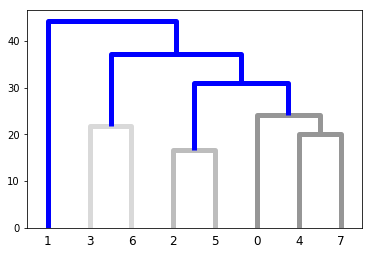

In [11]:
print(D)
condensedD = D
Y = sch.linkage(condensedD, method='complete', optimal_ordering=False)
Z1 = sch.dendrogram(Y, orientation='top')

In [12]:
def make_colormap(colors):
    from matplotlib.colors import LinearSegmentedColormap, ColorConverter
    from numpy import sort

    z  = np.array(sorted(colors.keys()))
    n  = len(z)
    z1 = min(z)
    zn = max(z)
    x0 = (z - z1) / (zn - z1)

    CC = ColorConverter()
    R = []
    G = []
    B = []
    for i in range(n):
        Ci = colors[z[i]]      
        if type(Ci) == str:
            RGB = CC.to_rgb(Ci)
        else:
            RGB = Ci
        R.append(RGB[0])
        G.append(RGB[1])
        B.append(RGB[2])

    cmap_dict = {}
    cmap_dict['red']   = [(x0[i],R[i],R[i]) for i in range(len(R))]
    cmap_dict['green'] = [(x0[i],G[i],G[i]) for i in range(len(G))]
    cmap_dict['blue']  = [(x0[i],B[i],B[i]) for i in range(len(B))]
    mymap = LinearSegmentedColormap('mymap',cmap_dict)
    return mymap

[6, 0, 3, 2, 5, 1, 4, 7] 8
CSN4
CSN5
CSN6
CSN7
CSN1
CSN2
CSN3
CSN8
['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8']
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8


/Users/Ilan/bin/miniconda3/envs/for_imp/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


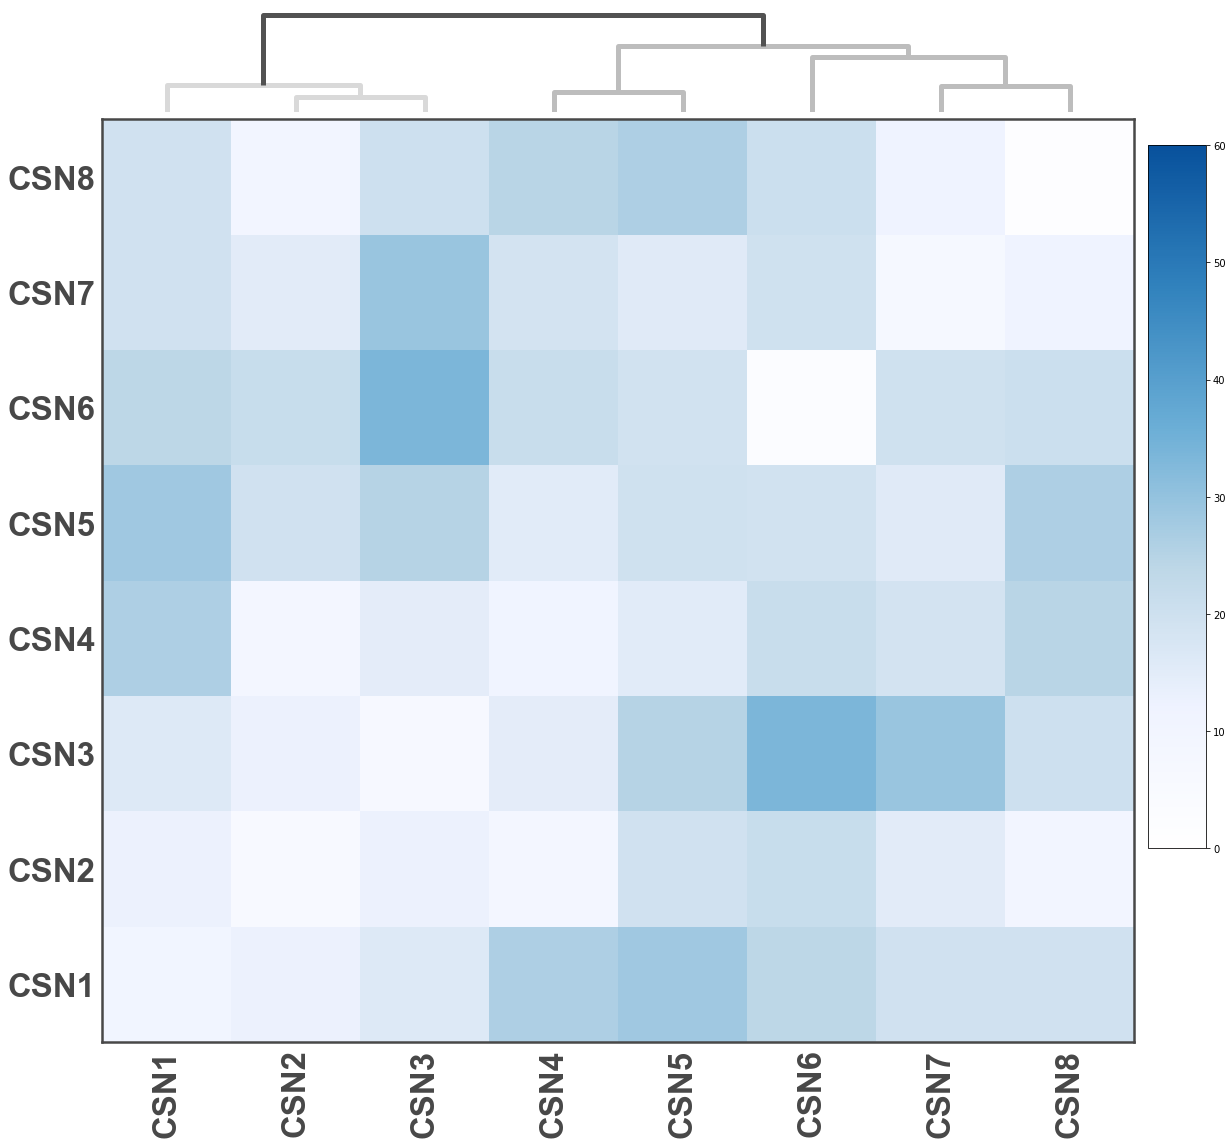

In [13]:
fig, ax = plt.subplots(figsize=(16.0,16.0))
gs = gridspec.GridSpec(2, 1, 
                       width_ratios = [1.0],
                       height_ratios = [0.1,0.9])

ax = plt.subplot(gs[0])
matplotlib.rcParams['lines.linewidth'] = 5.0
#ax.set_title('dRMSD between components', fontsize=16, fontname='Arial', color="#484848", fontweight='bold')
sch.set_link_color_palette(['#d9d9d9','#bdbdbd','#969696','#737373','#525252'])

Y = sch.linkage(condensedD, metric='correlation', method='complete',optimal_ordering=False)
Z1 = sch.dendrogram(Y, above_threshold_color='#525252')

ax.set_xticks([])
ax.set_yticks([])

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = plt.subplot(gs[1])
# Reorder matrix
idx1 = Z1['leaves']
DDR = np.array(D)
DDR_new = DDR[idx1,:]
DDR_new = DDR_new[:,idx1]

print(idx1, len(idx1))

GnuPlotBlues = make_colormap({0.0:"#FFFFFF", 0.2:"#EFF3FF", 0.4:"#BDD7E7", 
                              0.6:"#6BAED6", 0.8:"#3182BD", 1.0:"#08519C"})
im = ax.matshow(DDR_new, cmap=GnuPlotBlues, origin='lower', aspect="auto", vmin=0, vmax=60.0)

ax.xaxis.set_ticks_position('bottom')
ax.set_yticks(range(len(DDR)))
ax.set_xticks(range(len(DDR)))
ax.tick_params(axis="x", bottom=False)
ax.tick_params(axis="y", left=False)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color("#484848")


for lb in labels:
    print(lb)

labels_new = [labels[i] for i in idx1]
labels_new = sorted(labels)
print(labels_new)
exit()
for lb in labels_new:
    print(lb)

from matplotlib.ticker import FormatStrFormatter
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%s'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%11s'))
plt.xticks(range(len(labels_new)), labels_new, fontname='Arial', fontsize=33, color="#484848", fontweight='bold', rotation=90)
plt.yticks(range(len(labels_new)), labels_new, fontname='Arial', fontsize=33, color="#484848", fontweight='bold', rotation=0)

#plt.gca().tick_params(axis="x",rotation=90,size=16, fontname='Arial')
#plt.gca().tick_params(axis="y",rotation=0.)


#ax.set_xticklabels([str(label) for label in labels_new], rotation=90,fontsize=16, fontname='Arial')
#ax.set_yticklabels(labels_new, rotation=0 ,fontsize=16, fontname='Arial')

cax = fig.add_axes([1.0, 0.26, 0.05, 0.61])
fig.colorbar(im, cax=cax)

#ax = fig.add_subplot(gs[1,1])
#plt.colorbar(cax, ax=ax)

plt.tight_layout(h_pad = 0.0)
fig.savefig('dRMSD_Cluster.png', dpi=400, transparent=True)